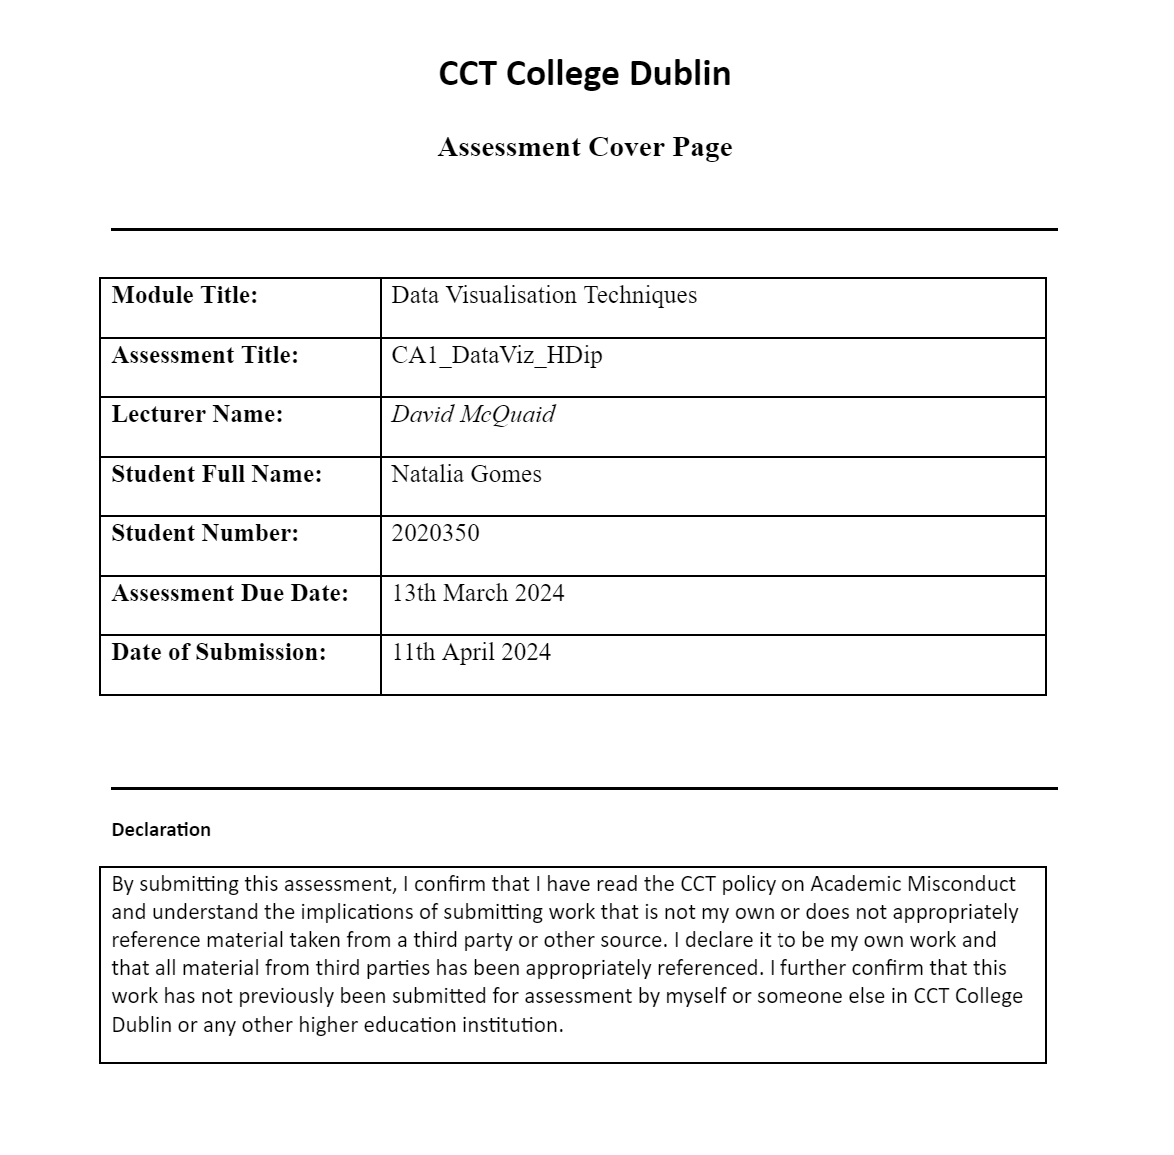

## GITHUB link

git@github.com:nataliag248/NataliaGomes_DPrepHDip_CA1.git

<b>PART 1:</b>

<b>What are the top 5 games by global sales?</b>

We will first load the vgsales dataset and then sorting it based on the "global_sales" column to find the top 5 games in a tabular format.

In [8]:
import pandas as pd

# Loading vgsales dataset
df = pd.read_csv('vgsales.csv')

# Sorting the dataset by global sales in descending order
top_5_global_sales = df.sort_values(by='Global_Sales', ascending=False).head(5)

top_5_global_sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<b>Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?</b>

We will filter the dataset for the years 2010-2014, then calculate the correlation coefficient between "na_sales" and "jp_sales". We will then plot the correlation in a scatterplot.

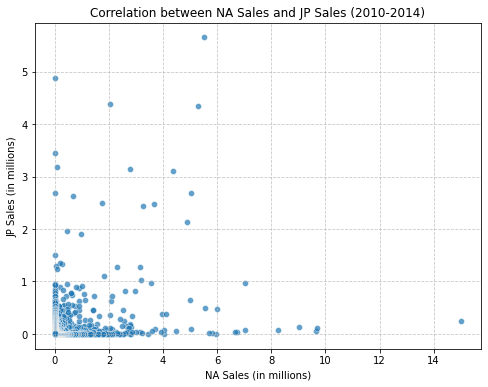

In [11]:
# Importing matplotlib library
import matplotlib.pyplot as plt
# Importing seaborn library
import seaborn as sns

# Filtering dataset for the years 2010-2014
sales_2010_2014 = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

# Calculating correlation coefficient
correlation = sales_2010_2014['NA_Sales'].corr(sales_2010_2014['JP_Sales'])

correlation

# Plotting the correlation between NA sales and JP sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_2010_2014, x='NA_Sales', y='JP_Sales', alpha=0.7)
plt.title('Correlation between NA Sales and JP Sales (2010-2014)')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('JP Sales (in millions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<b>What is the distribution of the most popular 4 game genres?</b>

We will determine the most popular 4 game genres based on the frequency of occurrence in the dataset, then visualize the distribution of these genres in a bar chart.

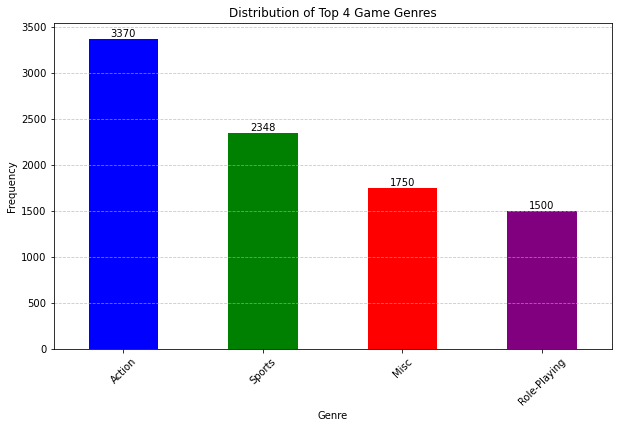

In [13]:
# Determining the most popular 4 game genres
top_4_genres = df['Genre'].value_counts().head(4)

# Define colors for each genre
colors = ['blue', 'green', 'red', 'purple']

# Plotting the distribution of the most popular 4 game genres
plt.figure(figsize=(10, 6))
top_4_genres.plot(kind='bar', color=colors)
plt.title('Distribution of Top 4 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to the bars
for i, value in enumerate(top_4_genres):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

<b>Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?</b>

We will split the dataset into two groups: games released in 2005 or earlier and games released after 2005. Then, we will calculate the mean of "eu_sales" for each group and compare them in a table.

In [14]:
# Splitting dataset into two groups
older_games = df[df['Year_of_Release'] <= 2005]
newer_games = df[df['Year_of_Release'] > 2005]

# Calculating mean of "eu_sales" for each group
mean_eu_sales_older = older_games['EU_Sales'].mean()
mean_eu_sales_newer = newer_games['EU_Sales'].mean()

# Creating a DataFrame to display the comparison
mean_sales_df = pd.DataFrame({
    'Category': ['Older Games (<= 2005)', 'Newer Games (> 2005)'],
    'Mean EU Sales': [mean_eu_sales_older, mean_eu_sales_newer]
})

mean_sales_df

,Category,Mean EU Sales
0,Older Games (<= 2005),0.147916
1,Newer Games (> 2005),0.144723


<b>What are the 3 most common “developer” in the dataset?</b>

We will determine the 3 most common developers by counting the occurrences of each developer in the dataset then visualize theresult on apie chart.

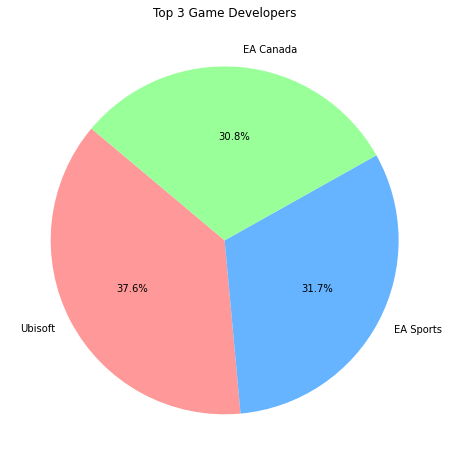

In [15]:
# Determining the 3 most common developers
top_3_developers = df['Developer'].value_counts().head(3)

top_3_developers

# Plotting the top 3 game developers using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_developers, labels=top_3_developers.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Top 3 Game Developers')
plt.show()

<b>PART 2: Statistically Relevant Question (of my own choosing)</b>

For this part, let us analyze the relationship between critic scores and global sales. We will investigate whether there is a correlation between these two variables.

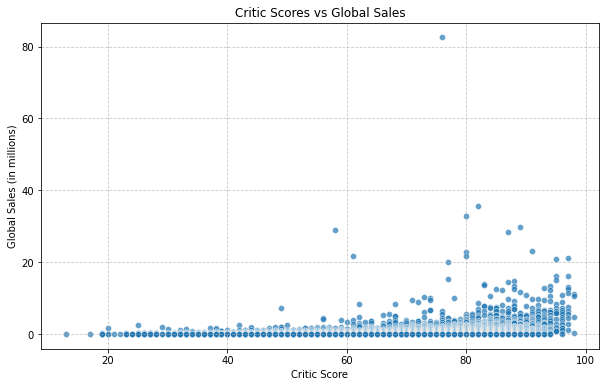

In [16]:
# Removing rows with missing critic scores or global sales
cleaned_df = df.dropna(subset=['Critic_Score', 'Global_Sales'])

# Plot the relationship between critic scores and global sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Critic_Score', y='Global_Sales', alpha=0.7)
plt.title('Critic Scores vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<b>PART 3: Explanation and Rationale</b>

<b>(i). Data Engineering Process</b>

-Loading the Dataset

I opted to use the pandas library to load the dataset due to its efficiency in handling structured data. Pandas provides convenient methods for reading various file formats, making it an ideal choice for data loading tasks.

-Cleaning the Data

Handling missing values was an important step for ensuring the integrity of the analysis. I chose to drop rows with missing critic scores or global sales data using the dropna() method. This approach ensured that I am working with complete data, which is essential for accurate analysis and visualization. Removing incomplete rows mitigates the risk of biasing our results or misinterpreting patterns in the data.

-Feature Selection

For each task in part 1 and 2, I carefully selected relevant columns from the dataset to perform the analysis. This involved identifying which variables are essential for addressing the specific questions posed in the scenario. Focusing on relevant features helps in streamlining the analysis process and extract meaningful insights more efficiently.

<b>(ii). Reasons for using specific Visualizations</b>

-Top 5 Games by Global Sales

I used a simple table to display the top 5 games by global sales from the "vgsales" dataset. This choice of visualization was deliberate, as it offers a clear and concise presentation of the information, enabling easy comprehension for stakeholders.

-Correlation between NA Sales and JP Sales

I used a scatter plot to visualize the correlation between NA sales and JP sales for the years 2010-2014. The scatter plot is particularly suitable for showcasing the relationship between two continuous variables, as each data point is represented individually. 

-Distribution of Top 4 Game Genres

I opted for a bar chart to visualize the distribution of the top 4 game genres. Each genre is represented diffrently to provide a clear indication of the frequency of each genre.

-Comparison of Mean EU Sales

I provided a tabular format visualization for the comparison of mean EU sales for older and newer games as it offers a clear and concise summary of the analysis.

-Top 3 Game Developers

I used a pie chart to visualize the distribution of the top 3 game developers, which offers a clear and visually appealing representation of proportions. 

-Relationship between Critic Scores and Global Sales

A scatter plot is used to visualize the relationship between critic scores and global sales. This choice of visualization enables to observe any potential correlation between the two variables. 

<b>(iii). Visualizations Design Decisions</b>

-Top 5 Games by Global Sales

This choice of visualization was deliberate, as it offers a clear and concise presentation of the information, enabling easy comprehension for stakeholders. The table format ensures that each game's name and corresponding global sales figures are clearly labeled, facilitating straightforward interpretation without the need for additional explanation.

-Correlation between NA Sales and JP Sales

Areas of high density in the scatter plot can be observed by adjusting the transparency parameter (alpha=0.7). Labeling was an essential aspect of any visualization as it provides context and clarity to the audience. In this case, the x-axis is labeled as "NA Sales (in millions)" to indicate the unit of measurement for North American sales, while the y-axis is labeled as "JP Sales (in millions)" to denote the unit of measurement for Japanese sales. The title "Correlation between NA Sales and JP Sales (2010-2014)" summarizes the content of the plot and specifies the time frame under consideration. 

-Distribution of Top 4 Game Genres

In the bar chart, each genre is represented by a distinct color: blue for Action, green for Sports, red for Shooter, and purple for Role-Playing. This choice of colors enhances the visual appeal and helps differentiate between the genres. I also added labels to the bars to provide a clear indication of the frequency of each genre.

-Comparison of Mean EU Sales

The tabular format allows for easy comparison between the two categories (older games released before or in 2005, and newer games released after 2005) and presents the mean EU sales in a structured and organized manner, facilitating quick understanding of the results.

-Top 3 Game Developers

The pie chart colors chosen for the pie chart are skyblue, lightcoral and lightgreen, which provide a visually pleasing contrast and help differentiate between each segment representing a game developer.

-Relationship between Critic Scores and Global Sales

The scatter plot's x-axis represents the critic scores, while the y-axis represents global sales in millions. Each point on the scatter plot corresponds to a data point in the dataset, where the x-coordinate represents the critic score of a game and the y-coordinate represents its global sales. The use of labels on the x-axis ("Critic Score") and y-axis ("Global Sales (in millions)") provides clear interpretation of the axes, enhancing the readability of the plot. The title "Critic Scores vs Global Sales" summarizes the content of the plot, aiding in understanding the purpose of the visualization. The inclusion of a grid with dashed lines further assists in assessing the relationships between data points. 

<b>(iv). Rationale for PART 2 Visualization alongside Enhancement of Information and Insight</b>

#### Rationale for PART 2 Visualization

I chose a scatter plot because it effectively displays the relationship between two continuous variables, critic scores, and global sales. Each data point represents a game, with its critic score on the x-axis and global sales on the y-axis. This allows for the examination of how changes in critic scores impact global sales. The scatter plot was excellent for identifying patterns or trends in the data. Plotting critic scores against global sales, helps us to visually assess if there's any correlation between the two variables and whether certain ranges of critic scores are associated with higher or lower global sales.

#### Enhancement of Information and Insight

The visualization of the relationship between critic scores and global sales provides critical insights for the retail company's sales strategy. Positive reviews from critics significantly influence consumer purchasing decisions, potentially leading to higher sales. The company gains insights into how critical reception impacts sales by visually analyzing this relationshi. This enables strategic decision-making and data-driven adjustments to marketing and promotion strategies. It also enhances the effectiveness and efficiency of their sales strategy, thereby driving improved performance in the upcoming Winter season.
